In [14]:
!pip install graphviz

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
# 평가 함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz
from sklearn.tree import export_graphviz

In [51]:
!pip install graphviz

In [55]:
matplotlib.rc("font", family = "Malgun Gothic")

In [64]:
import os

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz.38/bin/"

In [66]:
import os

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

In [16]:
# engine: 파일명 또는 데이터에 한글 포함 -> "python" 사용
# df_raw = pd.read_csv("/home/pirl/test/BigData/FITNESS_결측.csv", engine = "python")
df_raw = pd.read_csv("./df_t.csv")
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,Vol
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,934,1,8,2조,7.850335
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,937,1,8,2조,7.850335
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,889,1,8,3조,7.850280
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,885,1,8,3조,7.850280
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,873,1,8,1조,7.850376


In [21]:
df_raw_y = df_raw["SCALE"]
df_raw_x = df_raw.drop(["SCALE", "PLATE_NO", "ROLLING_DATE"], axis = 1, inplace = False)
df_raw_x =  pd.get_dummies(df_raw_x)
df_raw_x.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,...,0,0,0,1,0,0,0,1,0,0
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,...,0,0,0,1,0,0,0,1,0,0
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,...,0,0,1,0,1,0,0,0,1,0
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,...,0,0,1,0,1,0,0,0,1,0
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,...,0,0,1,0,0,1,1,0,0,0


In [23]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y .shape))

train data X size : (504, 96)
train data Y size : (504,)
test data X size : (216, 96)
test data Y size : (216,)


In [26]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.968


In [30]:
para_depth = [depth * 1 for depth in range(1,11)] 
para_split = [n_split*10 for n_split in range(1,11)]
para_leaf = [n_split*2 for n_split in range(1,11)]

estimator = DecisionTreeClassifier()
# 구하고자 하느 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, 
              "min_samples_leaf": para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

best parameter: 
{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 30}

best score: 
0.966


In [31]:
tree_final = DecisionTreeClassifier(max_depth = 6, min_samples_split = 30, min_samples_leaf = 8, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

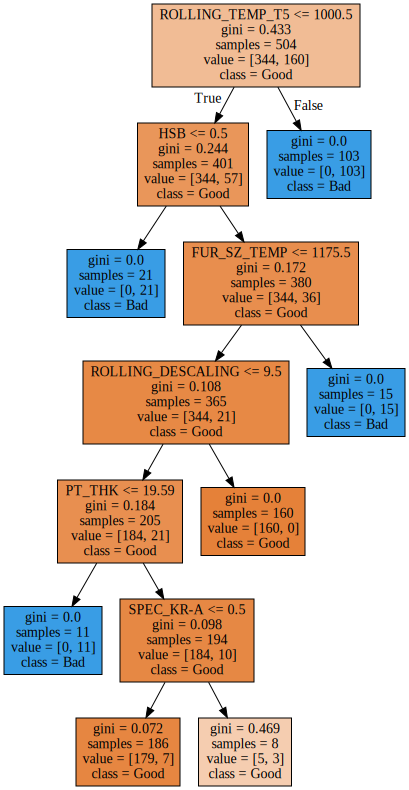

In [68]:
# 변수명 저장
v_feature_name = df_train_x.columns
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["Good", "Bad"],
               feature_names= v_feature_name, impurity = True, filled = True)

# tree_final.dot 그리기
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [69]:
# 평가
y_pred = tree_final.predict(df_test_x)

# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int)

print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confustion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred_class)))

Accuracy: 0.991

Confustion matrix: 
[[145   0]
 [  2  69]]


In [70]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# feature_importances의 테이블 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.600
11,HSB,0.162
7,FUR_SZ_TEMP,0.127
0,PT_THK,0.093
12,ROLLING_DESCALING,0.009
47,SPEC_KR-A,0.009
62,SPEC_LR-EH32-TM,0.000
71,SPEC_NV-A36-TM,0.000
70,SPEC_NV-A32-TM,0.000
69,SPEC_NV-A32,0.000


Text(0, 0.5, '설명변수')

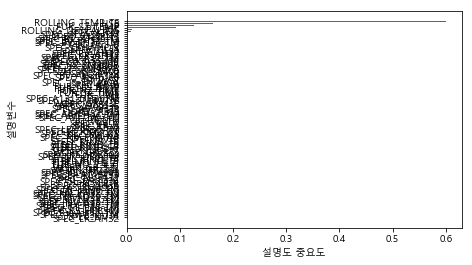

In [92]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림.
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명도 중요도")
plt.ylabel("설명변수")

In [83]:
df_importance.sort_values("Importance", ascending = False, inplace = True)

In [89]:
df_importance["Importance"][:6]

10    0.599520
11    0.162119
7     0.127220
0     0.093089
12    0.009374
47    0.008678
Name: Importance, dtype: float64

Text(0, 0.5, '설명변수')

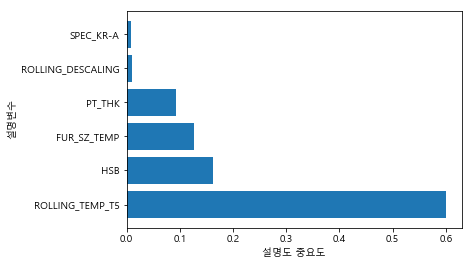

In [112]:
df_importance.sort_values("Importance", ascending = False, inplace = True)
coordinates = range(6)
plt.barh(y = coordinates, width = df_importance["Importance"][:6])
plt.yticks(coordinates, df_importance["Feature"][:6])
plt.xlabel("설명도 중요도")
plt.ylabel("설명변수")

In [122]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(df_test_y, y_pred)
cnf_matrix


array([[145,   0],
       [  2,  69]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

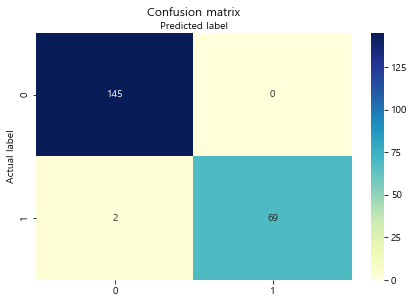

In [123]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [124]:
print("Accuracy:",metrics.accuracy_score(df_test_y, y_pred))
print("Precision:",metrics.precision_score(df_test_y, y_pred))
print("Recall:",metrics.recall_score(df_test_y, y_pred))

Accuracy: 0.9907407407407407
Precision: 1.0
Recall: 0.971830985915493


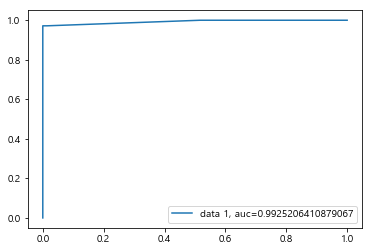

In [126]:
y_pred_proba = tree_final.predict_proba(df_test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(df_test_y,  y_pred_proba)
auc = metrics.roc_auc_score(df_test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [128]:
f1_score(df_test_y, y_pred)

0.9857142857142858